<img src="https://github.com/DennisFelixuff/Financas/blob/main/logo_dennis.jpg?raw=True" width="300" align="left"/>





---
# **Sharpe e Sortino Ratios**

#### Cálculo e comparação entre as duas importantes métricas de risco
---


Antes de selecionar um ativo financeiro, os investidores devem buscar o retorno ajustado ao risco e não apenas o retorno simples.



---







O índice de Sharpe e o índice de Sortino são métricas de retorno sobre o investimento ajustadas ao risco. O índice de Sharpe indica o desempenho de um investimento em comparação com um investimento sem risco, levando em consideração o nível de risco adicional envolvido em manter o investimento em ações. O índice Sortino é uma variação do índice Sharpe que considera apenas o risco negativo.



---



$\textbf{Sharpe ratio} = \frac{R{p}-R{f}}{{\sigma {p}}}$

where:<br>
$R{p}$ = return of portfolio (or stock)<br>
$R{f}$ = risk-free rate<br>
$\sigma {p}$ = standard deviation of returns<br>


$\textbf{Sortino ratio} = \frac{R{p}-R{f}}{{\sigma {p}}}$

where:<br>
$R{p}$ = return of portfolio (or stock)<br>
$R{f}$ = risk-free rate<br>
$\sigma {p}$ = standard deviation of the negative returns<br>

The Sharpe ratio is used more to evaluate low-volatility investment portfolios, and the Sortino variation is used more to evaluate high-volatility portfolios (bull markets).

# 1. Instalação e importação das bibliotecas

In [ ]:
!pip install quantstats
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import quantstats as qs
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 2. Obtenção de dados

Inicialmente, vamos observar como os dois índices estão correlacionados

Obter dados de BTC-USD

In [ ]:
df_btc = yf.download('BTC-USD', start = '2018-01-01')[['Close']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_btc.head()

,Close
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000


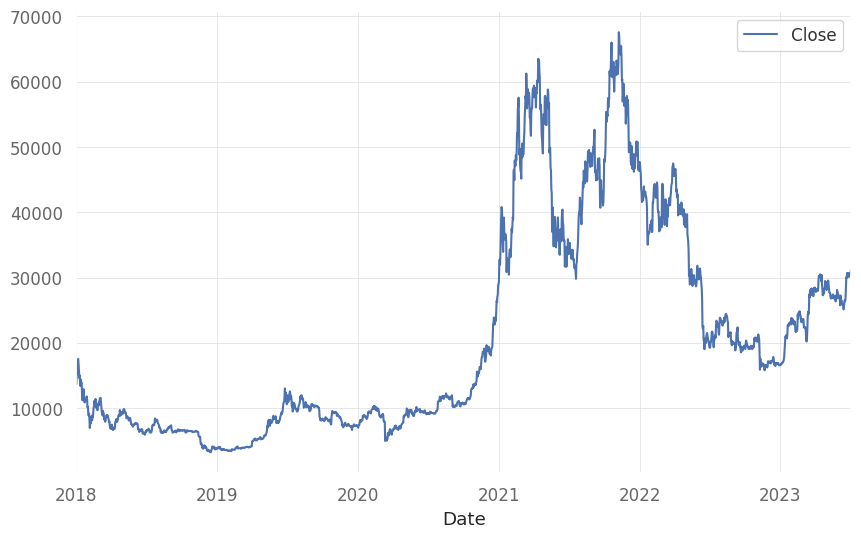

In [ ]:
df_btc.plot();

# 3. Análise das Métricas

A biblioteca quantstats apresenta um cálculo interessante da variação desses índices usando uma função rolling (um semestre ~ 126 dias) similar à pandas

Aqui calculamos Sharpe e Sortino ratios considerando uma taxa livre de risco de 5% por semestre

In [ ]:
sharpe_qs = pd.Series(qs.stats.rolling_sharpe(df_btc['Close'], rf = 0.05).values)
sortino_qs = pd.Series(qs.stats.rolling_sortino(df_btc['Close'], rf = 0.05).values)
sharpe_qs.index = df_btc.index
sortino_qs.index = df_btc.index

Vejamos a correlação entre os dois índices

In [ ]:
fig_corr = go.Figure()

fig_corr.add_trace({'type':'scatter',
                    'x': sharpe_qs,
                    'y': sortino_qs,
                    'mode': 'markers',
                    'line':{'color':'blue'}})

fig_corr.update_layout(template='simple_white', paper_bgcolor="#f7f8fa",
                        margin=dict(l=70, r=20, t=20, b=70),
                        xaxis_title='<b>Sharpe', yaxis_title='<b>Sortino',
                        width=500, height=500)

In [ ]:
corr, p = stats.pearsonr(sharpe_qs.dropna(), sortino_qs.dropna())
print('Correlação de Pearson, r=%.3f' %corr, 'p=%.3f' %p)

Correlação de Pearson, r=0.989 p=0.000


Com uma correlação tão alta, seria possível tirar algum insight comparando os dois indicadores de risco?

In [ ]:
fig = make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x = sharpe_qs.index, y = sharpe_qs,
                         name = 'Sharpe', line = dict(color = 'blue', width = 2)),
              secondary_y = False)

fig.add_trace(go.Scatter(x = sortino_qs.index, y = sortino_qs,
                         name = 'Sortino', line = dict(color = 'red', width = 2)),
              secondary_y = False)

fig.add_trace(go.Scatter(x = df_btc.index, y = np.log(df_btc['Close']),
                         name = 'log price BTC-USD', line = dict(color = 'black', width = 2)),
              secondary_y = True)

fig.update_yaxes(title_text = 'Risk-adjuste values', secondary_y = False)
fig.update_yaxes(title_text = 'log price BTC-USD', secondary_y = True)
fig.update_layout(title='<b>Sharpe vs Sortino ratios', xaxis_title="<b>Data", legend_title="",
                  font=dict(family="Arial, Arial, Arial",size=15,color="black"), template = 'simple_white', paper_bgcolor="#f7f8fa",
                  margin=dict(l=75, r=20, t=70, b=70), legend=dict(orientation="h",yanchor="bottom",y=1,xanchor="right",x=0.4),
                  width=1000,height=500)